# Importing Relevant Libraries

In [1]:
# Standard analytics packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import useful packages from sklearn
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer as Imputer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

#import stats library
import scipy.stats as stats

# Pre-Process and EDA

In [2]:
#Loading the data

df_train = pd.read_csv("cs-training.csv")
df_test = pd.read_csv("cs-test.csv")

df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Re-indexing the dataframes

In [3]:
df_train = df_train.drop(df_train.columns[0], axis = 1)
df_test = df_test.drop(df_test.columns[0], axis = 1)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


It is interesting to see that the maximum values for all the numder of times x amount of days late is 98, which by doing simple math, that does not make sense at all, and there seems to be an error in the data, further investigation is required.

In [5]:
print(f'The size of df_train is {df_train.shape}')
print(f'The size of df_test is {df_test.shape}')

The size of df_train is (150000, 11)
The size of df_test is (101503, 11)


Creating new dataframe which has columns in desired order for the remainder of analysis

In [6]:
columns = df_train.columns.tolist()

df_train_columns_sorted = columns[:3] + columns[4:6] + columns[3:4] + columns[6:]
df_train = df_train[df_train_columns_sorted]
df_test = df_test[df_train_columns_sorted]
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,0.802982,9120.0,2,13,0,6,0,2.0
1,0,0.957151,40,0.121876,2600.0,0,4,0,0,0,1.0
2,0,0.658180,38,0.085113,3042.0,1,2,1,0,0,0.0
3,0,0.233810,30,0.036050,3300.0,0,5,0,0,0,0.0
4,0,0.907239,49,0.024926,63588.0,1,7,0,1,0,0.0


## Age

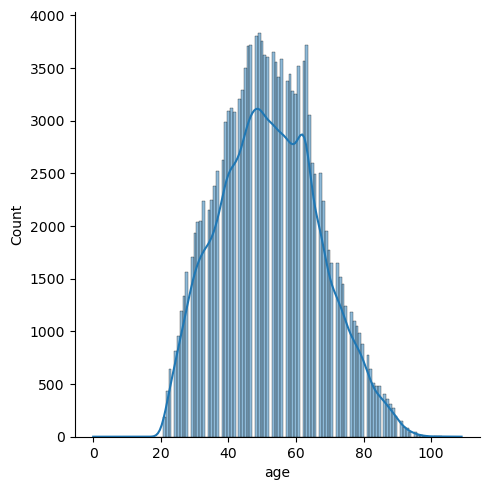

In [7]:
sns.displot(df_train["age"], kde = True)
plt.show()

C:\Users\R430i\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


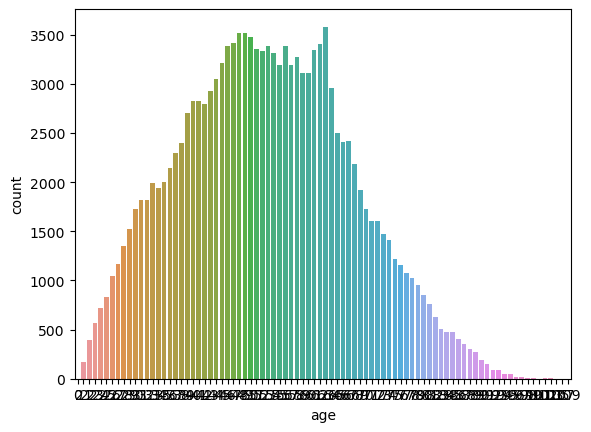

In [8]:
sns.countplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 0]["age"])
plt.show()

C:\Users\R430i\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


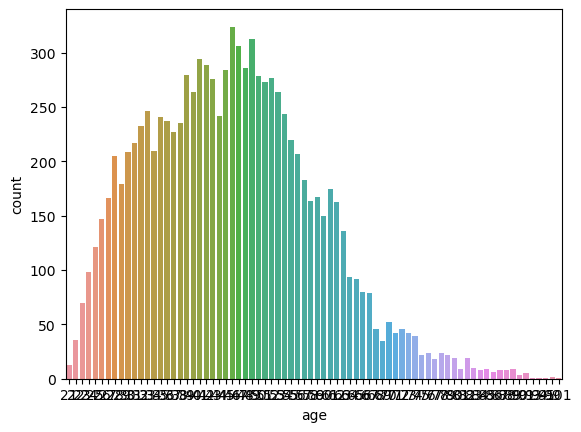

In [9]:
sns.countplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["age"])
plt.show()

As we can see from the data it seems that the majority of borrowers that default are 'young' which practically makes sense and the distribution seems to be alright, and seems to be a feature that will be important moving forward.

## Number of x days late columns

In [10]:
df_train["NumberOfTimes90DaysLate"].value_counts().sort_index()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [11]:
df_train["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [12]:
df_train["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

This is funny, all of them seem to have the same number of instances for 96 and 98 times past due notices, which again does not make sense, therefore moving forward will test models with different training sets, such as setting NumberOfTimes90DaysLate to <= 17 and ignore the 96 and 98 instances

## Monthly Income

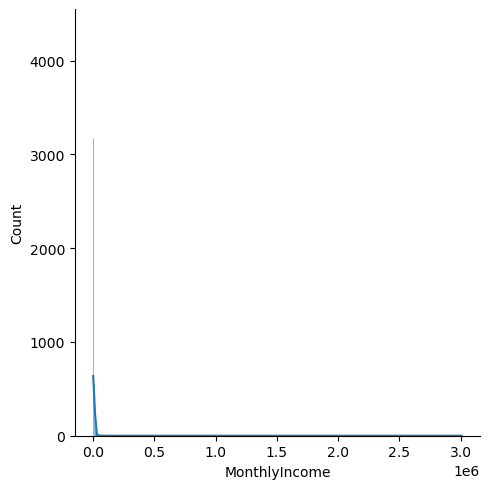

In [13]:
sns.displot(df_train["MonthlyIncome"].dropna(), kde = True)
plt.show()

Monthly income is skewed, moving forward might try imputing using median. 

## Number of Open Credit Lines and Loans

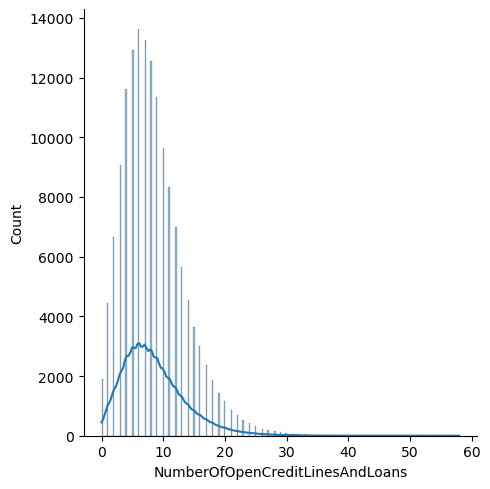

In [14]:
sns.displot(df_train["NumberOfOpenCreditLinesAndLoans"], kde = True)
plt.show()

## Revolving Utilization of Unsecured Credit Lines

C:\Users\R430i\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


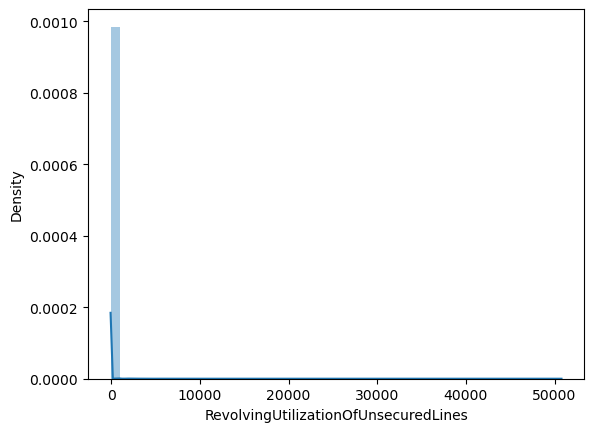

In [15]:
sns.distplot(df_train["RevolvingUtilizationOfUnsecuredLines"])
plt.show()

It seems revolving utilization is also skewed

In [16]:
# df_train["RevolvingUtilizationOfUnsecuredLines"].value_counts().sort_index()

## Debt Ratio 

C:\Users\R430i\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


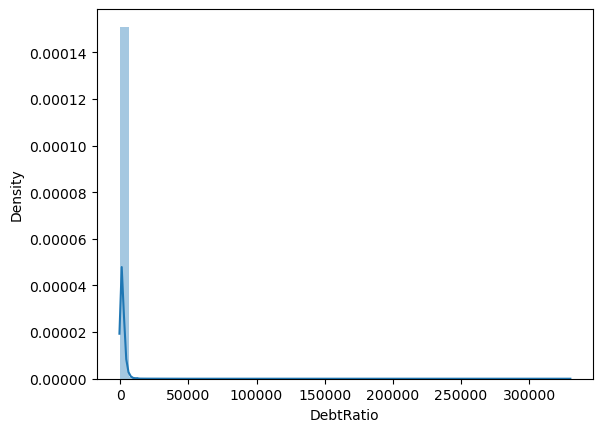

In [17]:
sns.distplot(df_train["DebtRatio"])
plt.show()

## Number Real Estate Loans or Lines

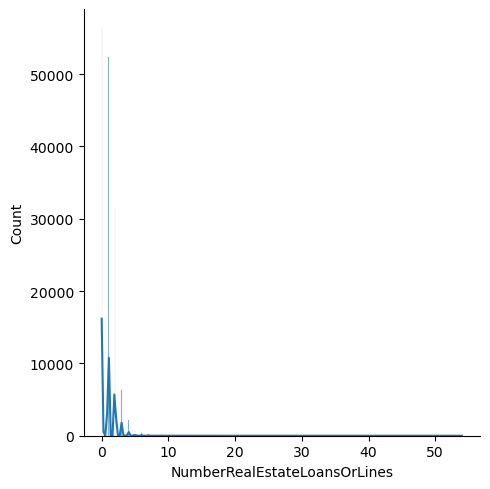

In [18]:
sns.displot(df_train["NumberRealEstateLoansOrLines"], kde = True)
plt.show()

Checking correlations with initial data

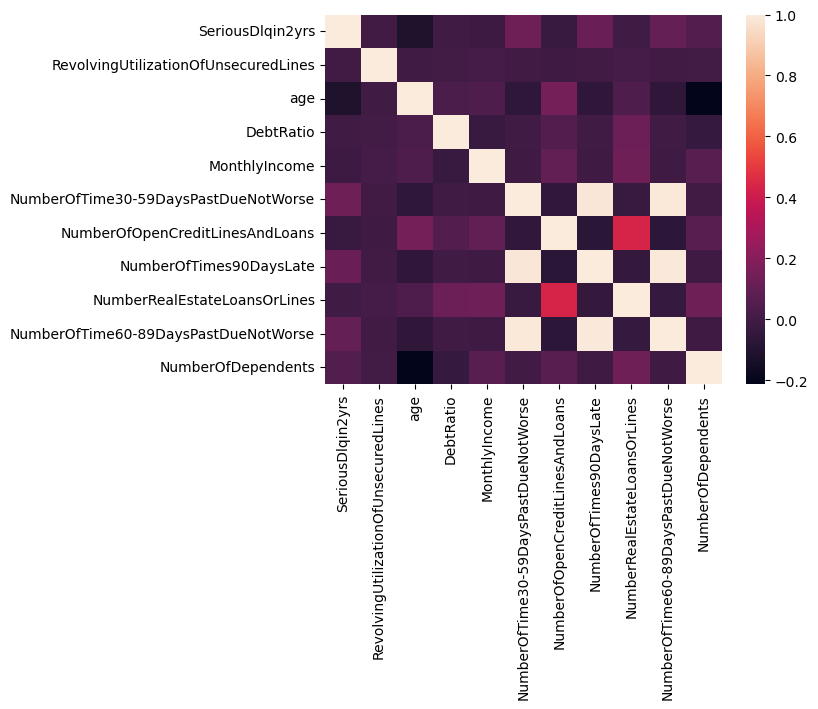

In [19]:
sns.heatmap(df_train.corr(), annot = False)
plt.show()

# Cleaning up data and creating multiple training and testing sets

## Missing values in training set

In [20]:
df_train.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfTime30-59DaysPastDueNotWorse      int64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [21]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfTime30-59DaysPastDueNotWorse        0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [22]:
imp_median = Imputer(strategy = 'median')
imp_mode = Imputer(strategy = 'most_frequent')

imp_median.fit(df_train[['MonthlyIncome']])
imp_mode.fit(df_train[['NumberOfDependents']])

df_train_mod = df_train.copy()

df_train_mod[['MonthlyIncome']] = imp_median.transform(df_train_mod[['MonthlyIncome']])
df_train_mod[['NumberOfDependents']] = imp_mode.transform(df_train_mod[['NumberOfDependents']])

df_train_mod.isnull().sum()

C:\Users\R430i\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfTime30-59DaysPastDueNotWorse    0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Missing Values in testing set

In [23]:
df_test.dtypes

SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfTime30-59DaysPastDueNotWorse      int64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [24]:
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfTime30-59DaysPastDueNotWorse         0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [25]:
imp_median.fit(df_test[['MonthlyIncome']])
imp_mode.fit(df_test[['NumberOfDependents']])

df_test_mod = df_test.copy()

df_test_mod[['MonthlyIncome']] = imp_median.transform(df_test_mod[['MonthlyIncome']])
df_test_mod[['NumberOfDependents']] = imp_mode.transform(df_test_mod[['NumberOfDependents']])

df_test_mod.isnull().sum()

C:\Users\R430i\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfTime30-59DaysPastDueNotWorse         0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

## Creating training and testing set for original data set (unmodified)

In [26]:
X_train, y_train = df_train.drop('SeriousDlqin2yrs', axis = 1), df_train['SeriousDlqin2yrs']
X_test, y_test = df_test.drop('SeriousDlqin2yrs', axis = 1), df_test['SeriousDlqin2yrs']

## Creating training and testing set for modified data set (only imputing missing values)

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_train_mod.drop(columns=['SeriousDlqin2yrs']),
                                                    df_train_mod.SeriousDlqin2yrs,
                                                    test_size = 0.15,
                                                    random_state = 2022,
                                                    stratify = df_train_mod.SeriousDlqin2yrs)

## Creating training and testing set for modified data set (imputing missing values and removing data errors, such as duplicate instances in days late)

In [28]:
df_train_mod2 = df_train_mod

df_train_mod2 = df_train_mod2[df_train_mod2['NumberOfTime30-59DaysPastDueNotWorse'] <= 17] 
df_train_mod2 = df_train_mod2[df_train_mod2['NumberOfTimes90DaysLate'] <= 17] 
df_train_mod2 = df_train_mod2[df_train_mod2['NumberOfTime60-89DaysPastDueNotWorse'] <= 17]

# df_train_mod2 = df_train_mod2.loc[df_train_mod2["DebtRatio"] <= df_train_mod2["DebtRatio"].quantile(0.975)]

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_train_mod2.drop(columns=['SeriousDlqin2yrs']),
                                                    df_train_mod2.SeriousDlqin2yrs,
                                                    test_size = 0.15,
                                                    random_state = 2022,
                                                    stratify = df_train_mod2.SeriousDlqin2yrs)

## Finding p-values for target data

In [29]:
from statsmodels.regression import linear_model
X = df_train_mod.drop('SeriousDlqin2yrs', axis=1)
y = df_train_mod['SeriousDlqin2yrs']
model = linear_model.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       SeriousDlqin2yrs   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.101
Method:                 Least Squares   F-statistic:                              1685.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):                        0.00
Time:                        18:18:31   Log-Likelihood:                         -1947.9
No. Observations:              150000   AIC:                                      3916.
Df Residuals:                  149990   BIC:                                      4015.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines -3.546e-07   2.53e-06     -0.140      0.889   -5.32e-06    4.61e-06
age                                      0.0005   2.22e-05     23.462      0.000       0.000       0.001
DebtRatio                             -9.39e-08   3.14e-07     -0.299      0.765   -7.08e-07    5.21e-07
MonthlyIncome                        -1.316e-07   4.95e-08     -2.658      0.008   -2.29e-07   -3.46e-08
NumberOfTime30-59DaysPastDueNotWorse     0.0510      0.001     52.921      0.000       0.049       0.053
NumberOfOpenCreditLinesAndLoans          0.0008      0.000      5.561      0.000       0.000       0.001
NumberOfTimes90DaysLate                  0.0541      0.001     41.752      0.000       0.052       0.057
NumberRealEstateLoansOrLines             0.0021      0.001      3.319      0.001       0.001       0.003
NumberOfTime60-89DaysPastDueNotWorse    -0.0982      0.001    -67.627      0.000      -0.101      -0.095
NumberOfDependents                       0.0153      0.001     27.149      0.000       0.014       0.016
==============================================================================
Omnibus:                   100843.349   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           919240.570
Skew:                           3.338   Prob(JB):                         0.00
Kurtosis:                      13.124   Cond. No.                     4.18e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Average number of borrowers who default

In [30]:
df_train_mod.describe()['SeriousDlqin2yrs'][1]

0.06684

Feature which has the strongest correlation with defaulting

In [31]:
summary_df = df_train.groupby('SeriousDlqin2yrs').sum()

fraction = summary_df.loc[1] / summary_df.loc[0]
fraction.idxmax()

'NumberOfTimes90DaysLate'

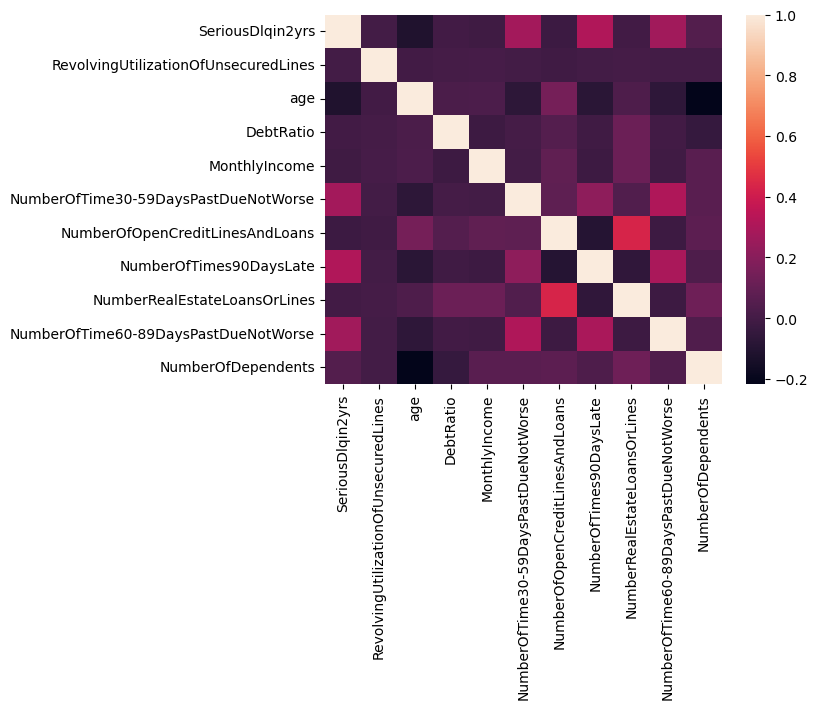

In [32]:
sns.heatmap(df_train_mod2.corr(), annot = False)
plt.show()

# Modelling and Scoring

In [33]:
def make_models():
  """Makes a dictionary of four untrained models"""
  
  return {
      'LR_L2': LogisticRegression(random_state=0, max_iter=1000),
      'LR_L1': LogisticRegression(random_state=0, penalty='l1', solver='liblinear', class_weight='balanced', max_iter=500),
      'CART': DecisionTreeClassifier(random_state=0, class_weight='balanced'),
      'RF': RandomForestClassifier(random_state=0, class_weight='balanced'),
  }

# Initialize a tuple of names for each model
model_names = ('LR_L2',  # Logistic regression with L2 regularizer
               'LR_L1',  # Logistic regression with L1 regularizer
               'CART',  # CART tree classifier
               'RF'  # Random forest classifier 
               )
# Initialize a tuple of technique names that we will cover
engineering_techniques = ('Baseline',  # Set of baseline models
                          'Scaling',  # Set of models trained with scaled data
                          'Feature Engineering',  # Set of models trained with engineered features
                          'Feature_Selection',  # Set of models trained with "selected" features
                          'Grid Search',  # Set of models trained via grid search
                          'Stacking',  # Set of stacked model 
                          'Bagging'  # A bagged model
                          )

# Initialize the multi indices of the `all_models` data frame
df_indices = pd.MultiIndex.from_product([model_names, engineering_techniques], names=('model names', 'technique'))
# Initialize the `all_models` data frame
all_models = pd.DataFrame(index=df_indices, columns=['Precision', 'Recall', 'Score', 'Model'])
all_models[['Precision', 'Recall', 'Score']] = all_models[['Precision', 'Recall', 'Score']].astype(float)
all_models  # Initialized data frame only has NaNs, which is perfect!

Precision  Recall  Score Model
model names technique                                          
LR_L2       Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN
LR_L1       Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN
CART        Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN
RF          Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN

In [34]:
# from sklearn.metrics import precision_score, recall_score

def fit_and_score_model(all_models, stage_name, X_train, X_out_of_sample, y_train, y_out_of_sample):
    """Fits the models that are initialized by models_dict on the X_train and y_train
    data, and evaluates the model on the out-of-sample data X_out_of_sample and y_out_of_sample"""
    
    # Make a dictionary of models
    models_dict = make_models()

    # Loop through each model in model_dict
    for model_name in models_dict:
        model = models_dict[model_name]


        model.fit(X_train, y_train)  # fit the model
        model_precision = precision_score(y_out_of_sample, model.predict(X_out_of_sample))  # evaluate precision on test set
        model_recall = recall_score(y_out_of_sample, model.predict(X_out_of_sample))  # evaluate recall on test set
        model_score = (model_precision + model_recall) / 2
        
        print(f'{model_name} achieved a precision of {model_precision:.3f} and recall of {model_recall:.3f}')
        
        all_models.loc[model_name, stage_name] = np.array((model_precision, model_recall, model_score, model), dtype='object')

    return all_models
    
all_models = fit_and_score_model(all_models, 'Baseline', X_train2, X_test2, y_train2, y_test2)
all_models.loc[:, 'Baseline', :].head()

LR_L2 achieved a precision of 0.611 and recall of 0.164
LR_L1 achieved a precision of 0.253 and recall of 0.601
CART achieved a precision of 0.251 and recall of 0.235
RF achieved a precision of 0.566 and recall of 0.145


,Precision,Recall,Score,Model
model names,,,,
LR_L2,0.610553,0.163968,0.387260,"LogisticRegression(max_iter=1000, random_state=0)"
LR_L1,0.253413,0.601215,0.427314,"LogisticRegression(class_weight='balanced', ma..."
CART,0.251260,0.235493,0.243376,DecisionTreeClassifier(class_weight='balanced'...
RF,0.565789,0.145074,0.355432,"(DecisionTreeClassifier(max_features='auto', r..."


In [35]:
technique_name = 'Scaling'

def standardize_data(X_train, X_out_of_sample):
    """standardizes all of the data in X_train and X_out_of_sample. The mean and
    standard deviation of each feature (i.e., each column) from the X_train
    data is used to standardize both the X_train and X_out_of sample."""

    # Initialize data frame for scaled data
    X_train_standardized = X_train.copy()
    X_out_of_sample_standardized = X_out_of_sample.copy()

    # Define scaling function
    scaler = StandardScaler()
    
    # -------------------------------------------------------------------------

    scaler.fit(X_train)

    X_train_standardized.loc[:]  = scaler.transform(X_train)
    X_out_of_sample_standardized.loc[:] = scaler.transform(X_out_of_sample)
                        
    # -------------------------------------------------------------------------

    return X_train_standardized, X_out_of_sample_standardized, scaler

# Make new data that is scaled"
X_train_scaled, X_test_scaled, scaler = standardize_data(X_train2, X_test2)

# Fit and score a model trained with scaled data
all_models = fit_and_score_model(all_models, technique_name, X_train_scaled, X_test_scaled, y_train2, y_test2)
all_models.loc[:, technique_name, :].head()

LR_L2 achieved a precision of 0.610 and recall of 0.159
LR_L1 achieved a precision of 0.253 and recall of 0.601
CART achieved a precision of 0.257 and recall of 0.233
RF achieved a precision of 0.554 and recall of 0.142


,Precision,Recall,Score,Model
model names,,,,
LR_L2,0.609819,0.159244,0.384532,"LogisticRegression(max_iter=1000, random_state=0)"
LR_L1,0.253413,0.601215,0.427314,"LogisticRegression(class_weight='balanced', ma..."
CART,0.256506,0.232794,0.244650,DecisionTreeClassifier(class_weight='balanced'...
RF,0.554090,0.141700,0.347895,"(DecisionTreeClassifier(max_features='auto', r..."


In [36]:
def compare_models(technique_name):
  """Prints out the average and biggest improvement observed between the 
  models trained with technique_name and the Baseline models"""

  # Evaluate score differences
  score_differences = (all_models.loc[:, technique_name, :].Score.values - all_models.loc[:, 'Baseline', :].Score.values)
  
  # Get the average and biggest score improvement
  mean_score_difference = score_differences.mean()
  most_score_improvement = score_differences.max()

  print(f'On average, scores improved by {mean_score_difference:.3f}, and the most improvement was {most_score_improvement:.3f}')

## Computing F-Scores

In [37]:
%%capture --no-stdout  
# from sklearn.feature_selection import f_classif
# Create a list of F-values for the existing features
feature_F_scores, _ = f_classif(X_train2, y_train2)

# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train2.columns):
  for f2_index, f2 in enumerate(X_train2.columns[f1_index + 1:]):
    # Multiply the two features to create a new feature
    new_feature = X_train2[[f1]].multiply(X_train2[f2], axis=0)
    # Evaluate F-value of new feature
    F_Score_new, p_value_new = f_classif(new_feature, y_train2)
    # Evaluate the relative improvement of the new feature
    F_score_improvement = F_Score_new[0] / max(feature_F_scores[[f1_index, f2_index]])
    # Print out features that is sufficiently improved 
    if F_score_improvement >= 1.5 and F_Score_new[0] >= 75 and p_value_new < 0.05:
        '''Note that F_score_improvement >= 1.5 and F_Score_new[0] >= 75 is
         relatively arbitrary, and that other values could be used.'''
        print(f'{f1} + {f2} has an F-score of {F_Score_new[0]:.2f}')
        print(f'\tBetter by a factor of {F_score_improvement:.2f} over features in isolation')
        print(f'\tThe result is significant (p = {p_value_new})')

age + NumberOfTime30-59DaysPastDueNotWorse has an F-score of 8575.26
	Better by a factor of 5.10 over features in isolation
	The result is significant (p = [0.])
DebtRatio + NumberOfTimes90DaysLate has an F-score of 1139.17
	Better by a factor of 34.18 over features in isolation
	The result is significant (p = [1.2814024e-248])
DebtRatio + NumberOfTime60-89DaysPastDueNotWorse has an F-score of 744.22
	Better by a factor of 8.61 over features in isolation
	The result is significant (p = [2.14551502e-163])
MonthlyIncome + NumberOfTime30-59DaysPastDueNotWorse has an F-score of 2731.44
	Better by a factor of 81.94 over features in isolation
	The result is significant (p = [0.])
MonthlyIncome + NumberOfTimes90DaysLate has an F-score of 7409.77
	Better by a factor of 222.29 over features in isolation
	The result is significant (p = [0.])
NumberOfOpenCreditLinesAndLoans + NumberOfTimes90DaysLate has an F-score of 7911.52
	Better by a factor of 91.51 over features in isolation
	The result is s

In [38]:
technique_name = 'Feature Engineering'

def new_feature_combos(X):
    """
    Make a new set of X data by doing algorithmic feature engineering
    """

    # First, we make a copy of the original X features
    X_new = X.copy()
    
    # Then we add new features
    X_new['DebtRatio * MonthlyIncome'] = X_new.DebtRatio * X_new.MonthlyIncome

    # Add any additional features that you might have found here
    return X_new

# Make new X features with interactions
X_train_interactions = new_feature_combos(X_train2)
X_test_interactions = new_feature_combos(X_test2)

# Fit and score the model, save it to the all models dictionary
all_models = fit_and_score_model(all_models, technique_name, X_train_interactions, X_test_interactions, y_train2, y_test2)
compare_models(technique_name)

C:\Users\R430i\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR_L2 achieved a precision of 0.000 and recall of 0.000
LR_L1 achieved a precision of 0.254 and recall of 0.601
CART achieved a precision of 0.267 and recall of 0.250
RF achieved a precision of 0.568 and recall of 0.142
On average, scores improved by -0.093, and the most improvement was 0.015


In [39]:
select_features = SelectKBest(f_classif, k=5)
select_features = select_features.fit(X_train2, y_train2)
feature_mask = select_features.get_support()
X_train_feature_selection = X_train2.iloc[:, feature_mask]
X_test_feature_selection = X_test2.iloc[:, feature_mask]

X_train2.columns[feature_mask]

Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [40]:
technique_name = 'Feature_Selection'
all_models = fit_and_score_model(all_models, technique_name, X_train_feature_selection, X_test_feature_selection, y_train2, y_test2)
compare_models(technique_name)

LR_L2 achieved a precision of 0.605 and recall of 0.157
LR_L1 achieved a precision of 0.253 and recall of 0.599
CART achieved a precision of 0.194 and recall of 0.465
RF achieved a precision of 0.210 and recall of 0.456
On average, scores improved by 0.014, and the most improvement was 0.086


In [41]:
params_to_search = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['auto', 'log2', None],
    'class_weight': ['balanced', None],
}

# Initialize a model
mdl = DecisionTreeClassifier(random_state=0)
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring = ['recall', 'precision'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10, 20]},
             refit=False, scoring=['recall', 'precision'])

In [42]:
result_df = pd.DataFrame(optimized_dt.cv_results_)
result_df['mean_test_score'] = (result_df['mean_test_recall'] + result_df['mean_test_precision'])/2
highest_mean_score_index = result_df.mean_test_score.argmax()

print(f'The best model has a score of {result_df.mean_test_score.max():.3f}')
print(f'The best model has the parameters {result_df.params.loc[highest_mean_score_index]}')

The best model has a score of 0.440
The best model has the parameters {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 20}


In [43]:
mean_test_pr = optimized_dt.cv_results_['mean_test_precision']
mean_test_re = optimized_dt.cv_results_['mean_test_recall']

params = optimized_dt.cv_results_['params']
best_model_params_index = (mean_test_pr + mean_test_re).argmax()
best_model_params = params[best_model_params_index]

# Initialize the model 
best_model = DecisionTreeClassifier(random_state=0, **best_model_params)
'''Note, the ** from above allows us to use a dictionary to set 
the parameters of a function'''

# Fit the model on the ENTIRE training set 
best_model.fit(X_train2, y_train2)

# Evaluate model precision, recall, and score
model_precision = precision_score(y_test1, best_model.predict(X_test1))  # evaluate precision on test set
model_recall = recall_score(y_test1, best_model.predict(X_test1))  # evaluate recall on test set
model_score = (model_precision + model_recall) / 2

# Add model scores to all_models data frame
all_models.loc['CART', 'Grid Search'] = (model_precision, model_recall, model_score, best_model)
all_models['Score'].loc['CART', ['Baseline', 'Grid Search']]

model names  technique  
CART         Baseline       0.243376
             Grid Search    0.557873
Name: Score, dtype: float64

In [44]:
# Define clustering model 
mdk_k_means = KMeans(n_init = 2,  # number of different centroid seed initializations (number of times algorithm is run)
                   n_clusters=10,  # number of clusters (k)
                   random_state = 0)  # random seed for k-means algorithm

# Fit the model to the training set
mdk_k_means.fit(X_train2)

# Get cluster assignments for each data point
clK = mdk_k_means.predict(X_train2)

# Get the centroid of each cluster
Centroids = mdk_k_means.cluster_centers_

In [45]:
'''A stacked model that begins with clustering'''
technique_name = 'Stacking'

# Initialize the clustering model
model = KMeans(n_init=10, n_clusters=6, random_state=0)
model.fit(X_train2)

# Stack training data
X_train_prediction = pd.Series(model.predict(X_train2), 
                            name='cluster',
                            index=X_train2.index)

# One-hot-encode cluster numbers
X_train_prediction = pd.get_dummies(X_train_prediction)

# Stack testing data
X_test_prediction = pd.Series(model.predict(X_test2),
                             name='cluster',
                             index=X_test2.index)
# One-hot-encode cluster numbers
X_test_prediction = pd.get_dummies(X_test_prediction)
# Get cluster numbers that weren't predicted in the testing set
missing_cluster_columns = X_train_prediction.columns.difference(X_test_prediction.columns)
# Add missing cluster dummy variables
X_test_prediction[missing_cluster_columns] = 0

# convert column names from int to str
X_train_prediction.columns = [str(c) for c in X_train_prediction.columns]
X_test_prediction.columns = [str(c) for c in X_test_prediction.columns]
X_test_prediction = X_test_prediction[[c for c in X_train_prediction.columns]]

# Add cluster numbers to features -- training
X_train_stacked = X_train2.join(X_train_prediction)

# Add cluster numbers to features -- test
X_test_stacked = X_test2.join(X_test_prediction)

# We will use logistic regression instead of a decision tree at the higher-level classifier
all_models = fit_and_score_model(all_models, technique_name, X_train_stacked, X_test_stacked, y_train2, y_test2)
compare_models(technique_name)

LR_L2 achieved a precision of 0.614 and recall of 0.162
LR_L1 achieved a precision of 0.255 and recall of 0.606
CART achieved a precision of 0.253 and recall of 0.237
RF achieved a precision of 0.581 and recall of 0.152
On average, scores improved by 0.004, and the most improvement was 0.011


In [46]:
# from sklearn.ensemble import VotingClassifier
technique_name = 'Bagging'

# Get a list of initialized models for bagging
models_dict = make_models()
# Convert models to list of tuples (required by documentation)
model_list = list(models_dict.items()) 

# Set the weights for each model as their relative performance
bagging_weights = all_models.Score[:,'Baseline'].values

# Initialize bagging model
bagging_model = VotingClassifier(model_list, weights=bagging_weights)
# Fit the bagging model (i.e., each of the four models that are bagged)
bagging_model.fit(X_train2, y_train2)

# Predict the target using the bagged model
bagging_prediction = bagging_model.predict(X_test2)

# Evaluate ensemble model
model_precision = precision_score(y_test2,  bagging_prediction)  # evaluate precision on testing set
model_recall = recall_score(y_test2,  bagging_prediction)  # evaluate recall on testing set
model_score = (model_precision + model_recall) / 2

# Add ensemble model to all_models dataframe
all_models.loc[:, technique_name, :] = (model_precision, model_recall, model_score, None) 
compare_models(technique_name)

On average, scores improved by 0.026, and the most improvement was 0.136


In [47]:
# Get the models with the best precision, recall, and score
best_models = all_models[['Score']].idxmax()
# Return the values
all_models.loc[best_models]

,,Precision,Recall,Score,Model
model names,technique,,,,
CART,Grid Search,0.228777,0.886968,0.557873,DecisionTreeClassifier(class_weight='balanced'...


After testing with multiple models and altering them from their baseline to grid searching, I found that scores were not the best, this might be because I'm validating with perceison and recall which I initially thought would be better than AUC, but it seems the scores I'm getting are not a good representation. All models used thus far are somewhat weak, but the best of the bunch seems to be the CART model, which is a decision tree classifier. Therefore to create a stronger model, I think its time to move on to some gradient boosting classifiers which should drastically improve score, and validate them with the recommended metric, AUC.

Because the following are gradient boosting classifiers, not much data manipulation is required as the model learns from its previous mistakes therfore moving forward will only use, training and testing sets from either the original data (xgboost is fully capable of handling missing values, that is why the original data can still work) or from the modified data only imputing missing values. 

The reason why I wont be using the modified data that has removed 'wrong' data is because these gradient boosting classifiers are going to need as much data as they can get to be able to regularize much better, or else they will overfit and essentially learn the data too hard, which might yield great AUC scores, but in hindsight these scores would have a large percent error.

In [48]:
#Gradient Boosting Classifier
mdl_gbc = GradientBoostingClassifier(n_estimators=900,max_depth=7, min_samples_leaf =120, min_samples_split =1000, max_features='sqrt', subsample=0.8, random_state=10)
mdl_gbc.fit(X_train1,y_train1)

gbcProb = mdl_gbc.predict_proba(X_test1)

fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test1, gbcProb[:,1])

roc_auc = auc(fpr_gbc,tpr_gbc)

print ('AUC Score :', roc_auc)

AUC Score : 0.8548715776155944


In [92]:
# mdl_xgbc = XGBClassifier(base_score=0.5, booster='gbtree',
#               colsample_bylevel = 1, colsample_bynode = 1, colsample_bytree = 0.5,
#               grow_policy = 'depthwise', learning_rate = 0.01, max_bin = 256,
#               max_depth = 7, max_leaves = 0, min_child_weight = 8, n_estimators = 900,
#               num_parallel_tree = 1, random_state=0, gpu_id = 0, reg_lambda = 3, reg_alpha = 0.1)

# mdl_xgbc.fit(X_train, y_train)

# xgbcProb2 = mdl_xgbc.predict_proba(X_test1)

# fpr_xgbc, tpr_xgbc, thresholds_xgbc = roc_curve(y_test1, xgbcProb2[:,1])

# roc_auc = auc(fpr_xgbc,tpr_xgbc)

# print ('AUC Score :', roc_auc)

AUC Score : 0.8799023870554878


In [49]:
mdl_xgbc = XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel = 1, colsample_bynode = 1, colsample_bytree = 0.5,
              grow_policy = 'depthwise', learning_rate = 0.01, max_bin = 256,
              max_depth = 7, max_leaves = 0, min_child_weight = 8, n_estimators = 900,
              num_parallel_tree = 1, random_state=0, gpu_id = 0, reg_lambda = 2, reg_alpha = 0.2)

mdl_xgbc.fit(X_train, y_train)

xgbcProb = mdl_xgbc.predict_proba(X_test1)

fpr_xgbc, tpr_xgbc, thresholds_xgbc = roc_curve(y_test1, xgbcProb[:,1])

roc_auc = auc(fpr_xgbc,tpr_xgbc)

print ('AUC Score :', roc_auc)

AUC Score : 0.8805487709411721


In [85]:
# mdl3_xgbc = XGBClassifier(base_score=0.5, booster='gbtree',
#               colsample_bylevel = 1, colsample_bynode = 0.5, colsample_bytree = 0.5,
#               grow_policy = 'depthwise', learning_rate = 0.01, max_bin = 256,
#               max_depth = 7, max_leaves = 0, min_child_weight = 8, n_estimators = 900,
#               num_parallel_tree = 1, random_state=0, gpu_id = 0, reg_lambda = 2, reg_alpha = 0.2)

# mdl3_xgbc.fit(X_train, y_train)

# xgbcProb3 = mdl3_xgbc.predict_proba(X_test1)

# fpr_xgbc, tpr_xgbc, thresholds_xgbc = roc_curve(y_test1, xgbcProb2[:,1])

# roc_auc = auc(fpr_xgbc,tpr_xgbc)

# print ('AUC Score :', roc_auc)

AUC Score : 0.8745927859105889


In [50]:
mdl_lgbmc = LGBMClassifier(is_unbalance = True)
mdl_lgbmc.fit(X_train1, y_train1)

lgbm_clf_proba = mdl_lgbmc.predict_proba(X_test1)

fpr_lgbmc, tpr_lgbmc, thresholds_lgbmc = roc_curve(y_test1, lgbm_clf_proba[:,1])

roc_auc = auc(fpr_lgbmc,fpr_lgbmc)

print ('AUC Score :', roc_auc)

AUC Score : 0.5


### Final csv submission of proababilities

In [51]:
final_probs = mdl_xgbc.predict_proba(df_test.drop('SeriousDlqin2yrs', axis=1))[:,1]
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': final_probs})
submission.to_csv("final_submission.csv", index=False)

## Confusion Matrix

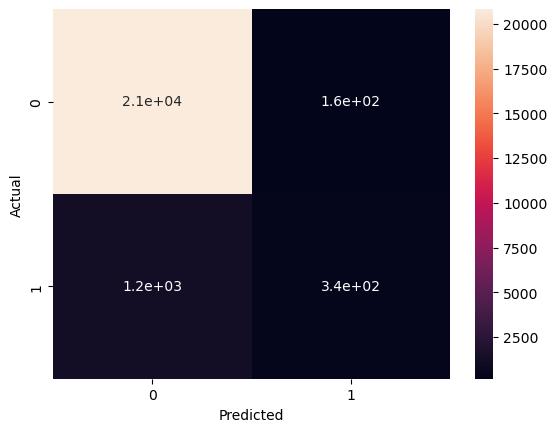

In [52]:
# Make a prediction
y_pred = mdl_xgbc.predict(X_test1)
# Make the confusion matrix
cfm = confusion_matrix(y_true=y_test1, y_pred=y_pred)
# Plot the confusion matrix as a heat map
ax = sns.heatmap(cfm, annot=True)
# Change the axis lables
ax.set(xlabel='Predicted', ylabel='Actual');

plt.show()

In [53]:
print(f'There are {cfm[0][0]} true negatives and {cfm[1][1]} true positives')

There are 20832 true negatives and 335 true positives


# Q&A 

## Part 1

#### What are the factors that have high correlation with the probability of loan default?

From EDA of the original data set it is clear that the feature that has the highest correlation with loan default is NumberOfTimes90DaysLate, NumberOfTime30-59DaysPastDueNotWorse, and NumberOfTime60-89DaysPastDueNotWorse. The one with the highest correlation initially seems to be NumberOfTimes90DaysLate. Even after imputing and cleaning up the dataframes these correlations still hold and can be seen on the correlation heatmaps.

#### Are there interaction effects occurring among the variables?

If we look at the correlation heatmap of the unmodified orginial dataset, we can see that there is a strong interaction effect between NumberOfTimes90DaysLate, NumberOfTime30-59DaysPastDueNotWorse, and NumberOfTime60-89DaysPastDueNotWorse. This effect seems somewhat intuitve as they all mean the same things, and there are number of instances where they even have matching values, which by doing simple calculations we can find that thos instances are actually incorrect but none the less it is why they are highly correlated togethor. After modifying the data and cleaning it up, there is another interaction effect that is noticed, which is there is a high correaltion between the NumberRealEstateLoansOrLines and NumberOfOpenCreditLinesAndLoans, which again seems intuitive. 

#### Any other preliminary analysis of the given dataset?

When focusing in on NumberOfTimes90DaysLate, NumberOfTime30-59DaysPastDueNotWorse, and NumberOfTime60-89DaysPastDueNotWorse we can see that there are duplicating instances where they are all 98 days for the same borrower/individual, which does not make sense at all, this was taken into consideration and after imputing missing values, these duplicate instances were removed. Also when looking at the distributions for most features in the dataset, most features are skewed. Also it was found that the proportion of borrowers who default on their loans is 0.06684

## Part 2

#### Tell us how you validate your model and why you chose such evaluation technique(s).

When first attempting to validate my models I decided to go with scoring using precision and recall, this is because precision and recall are better suited for imbalanced target data which is the case in this challenge and they can measure rare events much better than ROC metrics. Seeing the initial test scores I was getting I decided to switch back to AUC which was the recommended evaluation metric, because in this application it is more important to make sure that there are very few false positives and few false negatives, than try to measure rare events, since in real life this is a bank and the bank would want a model that is constantly reliable more reliable rather than always trying to measure very rare events.

#### What is AUC? Why do you think AUC was used as the evaluation metric for this challenge? What other metrics do you think would also be suitable for this competition?

AUC simply stands for area under the curve, specifically an ROC curve, the ROC curve is a plot of true positive rate (TPR) versus false positive rate (FPR) for different threshold values. Which means that the AUC for ROC curve would represent the probability that the model will rank a randomly chosen positive instance over a negatiuve one. It is used in a plot in applications where it is important to make sure that there are very few false positives (i.e., false alarms) or very few false negatives (i.e., missed detections). I believe that a big reason why AUC was used as the evaluation metric for this challenge was because the best model used for this challenge is technically a logistic regression model at its core. A logistic regression model outputs the probability of whether the the target is 1 or 0. Even for my final xgboost classifier model, I made sure to input the best values I could find for lamda and alpha which represent L2 and L1 regularization weights respectivley. I believe another good metric that can be used for this challenge is precision and recall, this is because precision and recall are better suited for imbalanced target data. Precision and recall can measure rare events much better than ROC metrics because they evaluate true positive, false positive, and false negative events, whereas ROC only looks at false positive and true positive. Although I did not achieve great scores with my orignal models, but I believe if I applied them to my improved models I would achieve outstanding scores.

#### Short explanation of what you tried. What worked and what did not work (ie. you might have tried different features/models before the final one).

I've tried a number of different models before landing on my last one, I tried logistic regression with both an L1 and L2 penalty, as well as a classification and regression tree (CART model), and finally a random forest model. Then I built on top of these models by first scoring them on their baseline results, then implemented a number of engineering techinques such as scaling, feature engineering, feature selection, performed a grid search with cross validation, stacking models, and even bagging. All these models were yielding poor scores, so I decided it was time for an upgrade. I then moved on to testing with different gradient boosting models from various frameworks. I stuck with gradient boosting classifiers and after testing with scikit learn gradient boosting classifier as well as xgboost classifier and lgbm classifier, I found that the xgboost gradient classifier yielded the best auc scores. I then continued to test by tuning with different relevant hyper parameters with trial and error until I managed to achieve the best auc score. For feature engineering I tried to compute the product of debt ratio and monthly income which represents the borrowers monthly debt payments, but this did not yield better scores. I also tried imputing the data by imputing monthly income with its median and number of dependants with its mode, and even mkaing sure there was no false entries for number of times 90 days late by removing any indexes that had a value greater than 17 and even makiong sure ages are above 0. Even with all these efforts and datya cleaning it seems that the xgboost performed its best with the raw unmodified data, which is probably because with more data the model was able to regularize much better and reduced overfitting.

#### What insight(s) do you have from your model(s)?

I created a confusion matrix which showed me the predicted vs actual number of times a person would default and I found that the model had 20832 true negatives and 335 true positives, this was using the modified testing set of imputed values, therefore is not an accurate representation of my best model. I have also found out that the gpu of ones system plays a huge role in how well the model performs, different gpu's even with the same code are able to output better or worse predicitons, I have found this out by once testing my code on jupyter notebooks and once on google collab, and even ran the xgboost with the google collab gpu and my own gpu, and I found it yielded different results although the code remained the same.

#### Can you get into the top 100 of the private leaderboard or even higher?

I'm glad to say that I not only was able to get into the top 100 on the private leaderboard but I managed to squeeze my way into the top 50, and achieving a rank of 43 rd. Check it out on myrank.jpg :)